### Importación de librerías y .CSV

In [1]:
## Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
#que se muesten todas las columnas de los df
pd.set_option('display.max_columns', None)

parte de los archivos.csv generados por el notebook Home Credit Default Rist

In [3]:
merge_test = pd.read_csv("merge_test.csv")

In [4]:
merge_train = pd.read_csv("merge_train.csv")

In [5]:
merge_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,NaN,-1572.0,378000.00,373239.00,0.0,3.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,-373.0,568800.00,543087.00,0.0,2.0,0.0,0.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
merge_train


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,6,7,4,3,1,8,5,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,24.0,0.0,5043.645,-1437.0,450000.0,245781.0,0.0,2.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,4,1,1,1,3,39,1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School,12.0,0.0,0.000,-2586.0,810000.0,0.0,0.0,1.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,6,7,4,3,1,8,11,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,4.0,0.0,0.000,-1326.0,94537.8,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,7,4,0,1,8,5,1,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,6,7,4,3,1,3,37,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,24.0,0.0,0.000,-1149.0,146250.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

<BarContainer object of 2 artists>

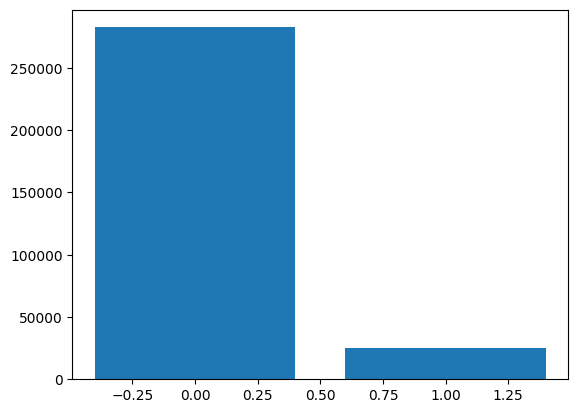

In [7]:
#observando distribución de la columna TARGET, hay un gran desbalance de clases
plt.bar(merge_train['TARGET'].value_counts().index,merge_train['TARGET'].value_counts())

In [8]:
(merge_train['TARGET'].value_counts())

,count
TARGET,
0,282686
1,24825


### Tratamientos de nulos y corrección de data types para modelos

In [9]:
#tipos de datos en cada columna del df
merge_test.dtypes

,0
SK_ID_CURR,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
...,...
AMT_CREDIT_SUM_DEBT,float64
CNT_CREDIT_PROLONG_MAX,float64
ACTIVE,float64
BAD_DEBT,float64


In [10]:
merge_test.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [11]:
#analizando las variables textuales (object o str)
text_var=[]
for col in merge_test:
    if merge_test[col].dtypes == object or merge_test[col].dtype == str:
         text_var.append(col)

text_var

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

las columnas ya estan codificadas en sus respectivas columnas  col_encoded, procede a eliminarse las columnas originales

In [12]:
#elimina columnas textuales
for col in merge_train:
    if col in text_var:
        merge_train.drop(col, axis=1, inplace=True)

In [13]:
merge_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,450000.0,245781.0,0.0,2.0,0.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,810000.0,0.0,0.0,1.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,94537.8,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,146250.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,0,-8456.0,-1982,NaN,1,1,0,1,0,0,1.0,1,1,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,6,7,4,2,5,14,43,1,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,56,1000,-4388.0,-4090,NaN,1,0,0,1,1,0,1.0,2,2,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,6,3,4,5,1,18,57,1,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,41,21,-6737.0,-5150,NaN,1,1,0,1,0,1,1.0,3,3,0.74

In [14]:
#las columnas con terminación _AVG tienen un gran porcentaje de nulos y son eliminadas
#se obtienen nombres de columnas
cols_avg=[]
for col in merge_train:
        if '_AVG' in col:
                cols_avg.append(col)


cols_avg

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG']

In [15]:
#se eliminan
for col in merge_train:
    if col in cols_avg:
        merge_train.drop(col, axis=1, inplace=True)

In [16]:
#Por la misma razón, se hace lo mismo con las columnas que contienen _CREDIT_BUREAU_
cols_credit_bureau=[]
for col in merge_train:
        if '_CREDIT_BUREAU_' in col:
                cols_credit_bureau.append(col)

cols_credit_bureau

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [17]:
for col in merge_train:
    if col in cols_credit_bureau:
        merge_train.drop(col, axis=1, inplace=True)

In [18]:
#los NULL de las siguientes columnas se reemplazarán con ceros
cols = ['DAYS_PST_DUE_MAX','AMT_LARGEST_RECORDED_DEBT','AMT_CREDIT_SUM_DEBT','CNT_CREDIT_PROLONG_MAX','ACTIVE','BAD_DEBT','COMPLETED','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS']
merge_train[cols] = merge_train[cols].fillna(0)
print(merge_train[cols].isna().sum())

#los NULL de las siguientes columnas se reemplazarán con la media
cols_for_mean = ['CNT_INSTALMENT_MAX','AMT_CREDIT_MAX']

for cols in cols_for_mean:

    merge_train[cols] = merge_train[cols].fillna(merge_train[cols].mean())

#los NULL de las siguientes columnas se reesplazarán con -3000
merge_train['DAYS_SINCE_LAST_APPLICATION'] = merge_train['DAYS_SINCE_LAST_APPLICATION'].fillna(-3000)
merge_train['DAYS_LAST_PHONE_CHANGE'] = merge_train['DAYS_LAST_PHONE_CHANGE'].fillna(-3000)

DAYS_PST_DUE_MAX             0
AMT_LARGEST_RECORDED_DEBT    0
AMT_CREDIT_SUM_DEBT          0
CNT_CREDIT_PROLONG_MAX       0
ACTIVE                       0
BAD_DEBT                     0
COMPLETED                    0
OBS_30_CNT_SOCIAL_CIRCLE     0
DEF_30_CNT_SOCIAL_CIRCLE     0
OBS_60_CNT_SOCIAL_CIRCLE     0
DEF_60_CNT_SOCIAL_CIRCLE     0
AMT_GOODS_PRICE              0
AMT_ANNUITY                  0
CNT_FAM_MEMBERS              0
dtype: int64


In [19]:
#OLD_CAR also stands for those cases which the person does not own a car
#para salvar esta columna numérica con muchos null, se hace categórica
merge_train['OLD_CAR'] = np.where(merge_train['OWN_CAR_AGE'] < 5, 0, 1)
merge_train.drop(['OWN_CAR_AGE'], axis=1, inplace=True)

#LO MISMO PARA TEST
merge_test['OLD_CAR'] = np.where(merge_test['OWN_CAR_AGE'] < 5, 0, 1)
#la columna original se eliminará posteriormente

In [20]:
#ultimo vistazo al df merge_train
merge_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,4.500000e+05,245781.0,0.0,2.0,0.0,0.0,1
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,8.100000e+05,0.0,0.0,1.0,0.0,0.0,1
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,9.453780e+04,0.0,0.0,0.0,0.0,0.0,1
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,1.462500e+05,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,0,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,0.145570,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,1,0,0,6,7,4,2,5,14,43,1,8.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,56,1000,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,NaN,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,1,6,3,4,5,1,18,57,1,6.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,41,21,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,0.744026,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0,0,0,1,6,7,1,2,1,10,39,1,12.0,5.0,0.000,-919.0,2.250000e+06,1624797.0,0.0,2.0,0.0,0.0,1
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,32,13,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,NaN,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0,0,0,1,6,1,4,1,1,8,3,1,16.0,0.0,0.000,-1104.0,4.500000e+04,0.0,0.0,0.0,0.0,0.0,1


#### DF merge_test

In [21]:
for col in merge_train.columns:
  if not col in merge_test.columns:
    print(col)

TARGET
YEARS_OLD
YEARS_EMPLOYED
NAME_CONTRACT_TYPE_encoded
CODE_GENDER_encoded
FLAG_OWN_CAR_encoded
FLAG_OWN_REALTY_encoded
NAME_TYPE_SUITE_encoded
NAME_INCOME_TYPE_encoded
NAME_EDUCATION_TYPE_encoded
NAME_FAMILY_STATUS_encoded
NAME_HOUSING_TYPE_encoded
OCCUPATION_TYPE_encoded
ORGANIZATION_TYPE_encoded
DOCUMENT_COUNT


In [22]:
text_var

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [23]:
#encoded

for col in ['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']:
    le = LabelEncoder()
    merge_test[col + '_encoded'] = le.fit_transform(merge_test[col])

In [24]:
#document count
documents_columns = [col for col in merge_test.columns if col.startswith('FLAG_DOCUMENT')]
merge_test['DOCUMENT_COUNT']= merge_test[documents_columns].sum(axis=1)
merge_test.drop(documents_columns, axis=1, inplace=True)

#years

merge_test.DAYS_BIRTH = merge_test.DAYS_BIRTH.apply(lambda x: int(abs(x)/365))
merge_test.DAYS_EMPLOYED = merge_test.DAYS_EMPLOYED.apply(lambda x: int(abs(x)/365))
merge_test.rename(columns={'DAYS_BIRTH': 'YEARS_OLD'}, inplace=True)
merge_test.rename(columns={'DAYS_EMPLOYED': 'YEARS_EMPLOYED'}, inplace=True)


#To fill the Nan values from EXT_SOURCE_1, EXT_SOURCE_2,EXT_SOURCE_3, 0.5 will be the default value:

merge_train['EXT_SOURCE_1'] = merge_train['EXT_SOURCE_1'].fillna(0.5)
merge_train['EXT_SOURCE_2'] = merge_train['EXT_SOURCE_2'].fillna(0.5)
merge_train['EXT_SOURCE_3'] = merge_train['EXT_SOURCE_3'].fillna(0.5)

In [25]:
#elimina del df merge_test todas las columnas que no estén en el df merge_train
for col in merge_test:
    if not col in merge_train:
        merge_test.drop(col, axis=1, inplace=True)

merge_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,52,6,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,0.752614,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,4.0,7.0,NaN,-1572.0,378000.00,373239.00,0.0,3.0,0.0,0.0,1,0,0,0,1,6,6,1,1,1,18,28,1
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,49,12,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,0.564990,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,-373.0,568800.00,543087.00,0.0,2.0,0.0,0.0,1,0,1,0,1,6,6,4,1,1,9,42,1
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,54,12,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,NaN,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,36.0,0.0,19305.0,-2070.0,1262250.00,0.00,0.0,0.0,0.0,0.0,1,0,1,1,1,7,6,1,1,1,4,54,1
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,38,5,-2000.0,-4208,1,1,0,1,1,0,4.0,2,2,0.525734,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,24.0,0.0,0.0,-2105.0,393750.00,151015.50,0.0,5.0,0.0,0.0,1,0,0,0,1,6,6,4,1,1,14,5,1
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,35,6,-4000.0,-4262,1,1,1,1,0,0,3.0,2,2,0.202145,0.425687,NaN,0.0,0.0,0.0,0.0,-821.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,1,0,6,6,4,1,1,18,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,121500.0,412560.0,17473.5,270000.0,0.002042,54,14,-9094.0,-3399,1,1,1,1,1,0,1.0,3,3,NaN,0.648575,0.643026,1.0,0.0,1.0,0.0,-684.0,24.0,0.0,17131.5,-1337.0,488070.00,278901.00,0.0,2.0,0.0,0.0,1,0,0,0,1,6,6,4,4,1,18,33,1
48740,456222,2,157500.0,622413.0,31909.5,495000.0,0.035792,30,3,-3015.0,-3003,1,1,0,1,0,0,4.0,2,2,NaN,0.684596,NaN,2.0,0.0,2.0,0.0,0.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,6,1,4,1,1,14,51,1
48741,456223,1,202500.0,315000.0,33205.5,315000.0,0.026392,43,8,-2681.0,-1504,1,1,0,1,1,0,3.0,2,2,0.733503,0.632770,0.283712,0.0,0.0,0.0,0.0,-838.0,12.0,0.0,0.0,-1017.0,1932340.50,21343.50,0.0,1.0,0.0,0.0,0,0,0,1,1,6,1,4,1,1,18,5,1
48742,456224,0,225000.0,450000.0,25128.0,450000.0,0.018850,38,7,-1461.0,-1364,1,1,1,1,1,0,2.0,2,2,0.373090,0.445701,0.595456,0.0,0.0,0.0,0.0,-2308.0,24.0,0.0,6556.5,-2738.0,991189.08,380604.06,0.0,6.0,0.0,0.0,1,0,1,0,0,1,1,1,1,1,10,42,1


In [26]:
#debería tener 51 colunas (las mismas que TRAIN menos una que es TARGET), faltan las encoded y otras calculadas

In [27]:
#Corrección de nulos para merge_test

cols = ['DAYS_PST_DUE_MAX','AMT_LARGEST_RECORDED_DEBT','AMT_CREDIT_SUM_DEBT','CNT_CREDIT_PROLONG_MAX','ACTIVE','BAD_DEBT','COMPLETED','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS']
merge_test[cols] = merge_test[cols].fillna(0)
print(merge_test[cols].isna().sum())


cols_for_mean = ['CNT_INSTALMENT_MAX','AMT_CREDIT_MAX']
for cols in cols_for_mean:

    merge_test[cols] = merge_test[cols].fillna(merge_test[cols].mean())



merge_test['DAYS_SINCE_LAST_APPLICATION'] = merge_test['DAYS_SINCE_LAST_APPLICATION'].fillna(-3000)
merge_test['DAYS_LAST_PHONE_CHANGE'] = merge_test['DAYS_LAST_PHONE_CHANGE'].fillna(-3000)



merge_test['EXT_SOURCE_1'] = merge_test['EXT_SOURCE_1'].fillna(0.5)
merge_test['EXT_SOURCE_2'] = merge_test['EXT_SOURCE_2'].fillna(0.5)
merge_test['EXT_SOURCE_3'] = merge_test['EXT_SOURCE_3'].fillna(0.5)

DAYS_PST_DUE_MAX             0
AMT_LARGEST_RECORDED_DEBT    0
AMT_CREDIT_SUM_DEBT          0
CNT_CREDIT_PROLONG_MAX       0
ACTIVE                       0
BAD_DEBT                     0
COMPLETED                    0
OBS_30_CNT_SOCIAL_CIRCLE     0
DEF_30_CNT_SOCIAL_CIRCLE     0
OBS_60_CNT_SOCIAL_CIRCLE     0
DEF_60_CNT_SOCIAL_CIRCLE     0
AMT_GOODS_PRICE              0
AMT_ANNUITY                  0
CNT_FAM_MEMBERS              0
dtype: int64


### ANALISIS DE DATOS

In [28]:
#FULL DATAFRAME
#para hacer el análisis de datos, se unen los df test y train
home_credit_risk = pd.concat([merge_train, merge_test], join="inner")

In [29]:
merge_train.shape

(307511, 52)

In [30]:
home_credit_risk

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,4.500000e+05,245781.00,0.0,2.0,0.0,0.0,1
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,0.500000,1.0,0.0,1.0,0.0,-828.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,8.100000e+05,0.00,0.0,1.0,0.0,0.0,1
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0.500000,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,9.453780e+04,0.00,0.0,0.0,0.0,0.0,1
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0.500000,0.650442,0.500000,2.0,0.0,2.0,0.0,-617.0,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,0.000,-3000.0,9.760041e+05,0.00,0.0,0.0,0.0,0.0,1
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0.500000,0.322738,0.500000,0.0,0.0,0.0,0.0,-1106.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,1.462500e+05,0.00,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,121500.0,412560.0,17473.5,270000.0,0.002042,54,14,-9094.0,-3399,1,1,1,1,1,0,1.0,3,3,0.500000,0.648575,0.643026,1.0,0.0,1.0,0.0,-684.0,0,0,0,1,6,6,4,4,1,18,33,1,24.0,0.0,17131.500,-1337.0,4.880700e+05,278901.00,0.0,2.0,0.0,0.0,1
48740,456222,2,157500.0,622413.0,31909.5,495000.0,0.035792,30,3,-3015.0,-3003,1,1,0,1,0,0,4.0,2,2,0.500000,0.684596,0.500000,2.0,0.0,2.0,0.0,0.0,0,0,0,0,6,1,4,1,1,14,51,1,24.0,0.0,0.000,-3000.0,1.089840e+06,0.00,0.0,0.0,0.0,0.0,1
48741,456223,1,202500.0,315000.0,33205.5,315000.0,0.026392,43,8,-2681.0,-1504,1,1,0,1,1,0,3.0,2,2,0.733503,0.632770,0.283712,0.0,0.0,0.0,0.0,-838.0,0,0,1,1,6,1,4,1,1,18,5,1,12.0,0.0,0.000,-1017.0,1.932340e+06,21343.50,0.0,1.0,0.0,0.0,0
48742,456224,0,225000.0,450000.0,25128.0,450000.0,0.018850,38,7,-1461.0,-1364,1,1,1,1,1,0,2.0,2,2,0.373090,0.445701,0.595456,0.0,0.0,0.0,0.0,-2308.0,0,1,0,0,1,1,1,1,1,10,42,1,24.0,0.0,6556.500,-2738.0,9.911891e+05,380604.06,0.0,6.0,0.0,0.0,1


(array([4.0000e+00, 1.2800e+03, 3.5110e+03, 4.6960e+03, 4.5300e+03,
        4.7450e+03, 5.2140e+03, 9.7200e+03, 9.2870e+03, 8.8650e+03,
        9.0040e+03, 9.6700e+03, 9.2360e+03, 8.9290e+03, 8.8820e+03,
        9.1010e+03, 9.8760e+03, 1.0235e+04, 1.0266e+04, 1.0207e+04,
        9.9800e+03, 9.7960e+03, 9.5820e+03, 9.6200e+03, 9.0710e+03,
        8.4530e+03, 8.4700e+03, 8.1600e+03, 8.1250e+03, 7.7650e+03,
        7.5240e+03, 7.7450e+03, 7.9150e+03, 8.5550e+03, 8.6850e+03,
        7.6610e+03, 7.9340e+03, 7.7790e+03, 7.2130e+03, 7.6240e+03,
        7.2290e+03, 6.3400e+03, 6.3660e+03, 6.0600e+03, 5.9450e+03,
        3.5570e+03, 2.5520e+03, 2.3730e+03, 9.0100e+02, 1.7000e+01]),
 array([20.  , 20.98, 21.96, 22.94, 23.92, 24.9 , 25.88, 26.86, 27.84,
        28.82, 29.8 , 30.78, 31.76, 32.74, 33.72, 34.7 , 35.68, 36.66,
        37.64, 38.62, 39.6 , 40.58, 41.56, 42.54, 43.52, 44.5 , 45.48,
        46.46, 47.44, 48.42, 49.4 , 50.38, 51.36, 52.34, 53.32, 54.3 ,
        55.28, 56.26, 57.24, 58.22

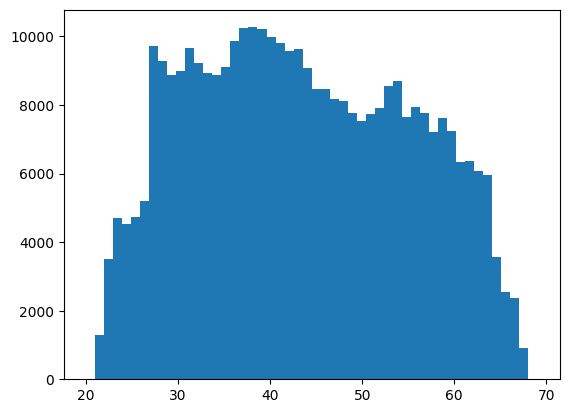

In [31]:
#edades de los solicitantes
plt.hist(home_credit_risk['YEARS_OLD'], bins=50)

(array([ 34036.,      0., 228715.,      0.,  22725.,      0.,  52480.,
             0.,   2211.,  16088.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

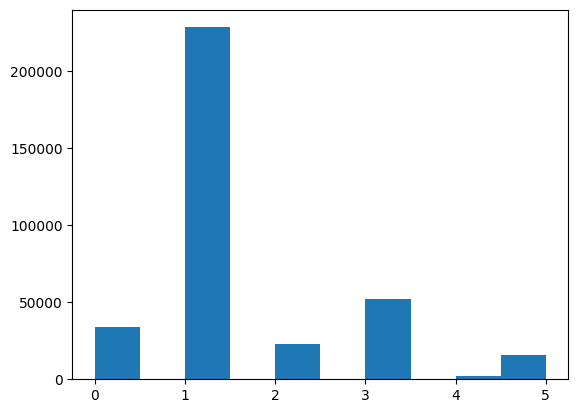

In [32]:
#estatus familiar
plt.hist(home_credit_risk['NAME_FAMILY_STATUS_encoded'])

(array([  1245.,      0., 316513.,      0.,  12800.,      0.,   3024.,
             0.,   5599.,  17074.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

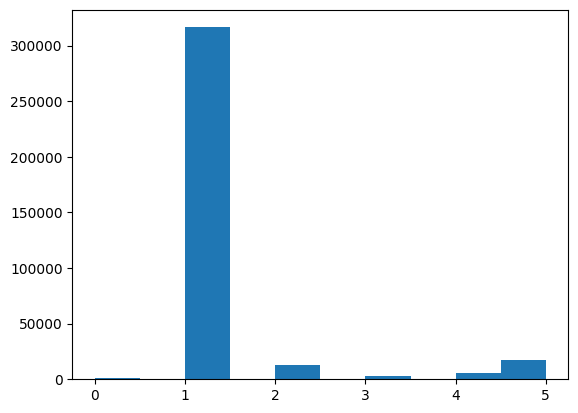

In [33]:
#tipo de casa
plt.hist(home_credit_risk['NAME_HOUSING_TYPE_encoded'])

In [34]:
home_credit_risk['CNT_CHILDREN'].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14, 20])

(array([2.50056e+05, 7.06230e+04, 3.06980e+04, 4.25200e+03, 4.78000e+02,
        9.60000e+01, 2.40000e+01, 8.00000e+00, 5.00000e+00, 2.00000e+00,
        2.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00]),
 array([ 0.        ,  0.95238095,  1.9047619 ,  2.85714286,  3.80952381,
         4.76190476,  5.71428571,  6.66666667,  7.61904762,  8.57142857,
         9.52380952, 10.47619048, 11.42857143, 12.38095238, 13.33333333,
        14.28571429, 15.23809524, 16.19047619, 17.14285714, 18.0952381 ,
        19.04761905, 20.        ]),
 <BarContainer object of 21 artists>)

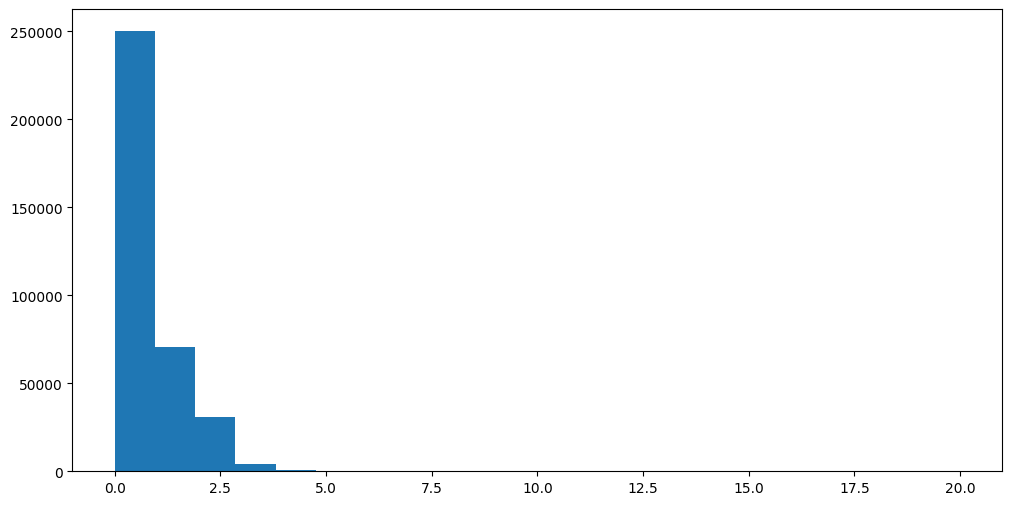

In [35]:
#cantidad de hijos
plt.figure(figsize=(12,6))
plt.hist(home_credit_risk['CNT_CHILDREN'], bins=21)

In [36]:
home_credit_risk['OCCUPATION_TYPE_encoded'].unique()

array([ 8,  3,  0, 10, 18,  4, 14,  1,  2, 12, 11, 16,  6, 17,  9, 13, 15,
        7,  5])

(array([ 16750.,   6840.,  31931.,  21376.,    667.,  13234.,    607.,
         63841.,   2365.,  24945.,   9853.,   3107.,    889.,  37174.,
          1518.,   7636., 113522.]),
 array([ 0.        ,  1.05882353,  2.11764706,  3.17647059,  4.23529412,
         5.29411765,  6.35294118,  7.41176471,  8.47058824,  9.52941176,
        10.58823529, 11.64705882, 12.70588235, 13.76470588, 14.82352941,
        15.88235294, 16.94117647, 18.        ]),
 <BarContainer object of 17 artists>)

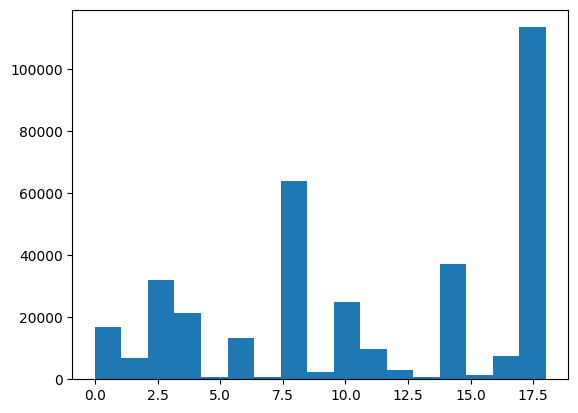

In [37]:
#ocupación
plt.hist(home_credit_risk['OCCUPATION_TYPE_encoded'],17)


In [38]:
home_credit_risk['YEARS_EMPLOYED'].unique()

array([   1,    3,    0,    8,    4, 1000,    5,    7,   21,   11,    2,
          9,   12,   14,   26,   19,    6,   10,   13,   24,   18,   23,
         15,   22,   27,   32,   20,   25,   42,   16,   30,   38,   33,
         17,   31,   28,   29,   36,   34,   40,   39,   35,   37,   41,
         44,   43,   48,   46,   45,   47,   49])

(array([3.1551e+04, 3.6371e+04, 3.4205e+04, 2.9201e+04, 2.5162e+04,
        1.9046e+04, 1.7227e+04, 1.5315e+04, 1.3454e+04, 1.0594e+04,
        8.6630e+03, 6.9540e+03, 6.1690e+03, 5.0850e+03, 5.3740e+03,
        3.3190e+03, 2.6860e+03, 2.3440e+03, 2.1990e+03, 2.1360e+03,
        1.8770e+03, 1.7250e+03, 1.4640e+03, 1.1750e+03, 1.0700e+03,
        9.4900e+02, 7.5500e+02, 7.7000e+02, 6.9400e+02, 6.5800e+02,
        5.3000e+02, 5.0000e+02, 4.0100e+02, 3.8100e+02, 4.0000e+02,
        2.8600e+02, 2.1700e+02, 1.5800e+02, 1.3100e+02, 1.3700e+02,
        7.2000e+01, 6.6000e+01, 4.8000e+01, 2.2000e+01, 3.5000e+01,
        1.8000e+01, 6.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([ 0.  ,  0.98,  1.96,  2.94,  3.92,  4.9 ,  5.88,  6.86,  7.84,
         8.82,  9.8 , 10.78, 11.76, 12.74, 13.72, 14.7 , 15.68, 16.66,
        17.64, 18.62, 19.6 , 20.58, 21.56, 22.54, 23.52, 24.5 , 25.48,
        26.46, 27.44, 28.42, 29.4 , 30.38, 31.36, 32.34, 33.32, 34.3 ,
        35.28, 36.26, 37.24, 38.22

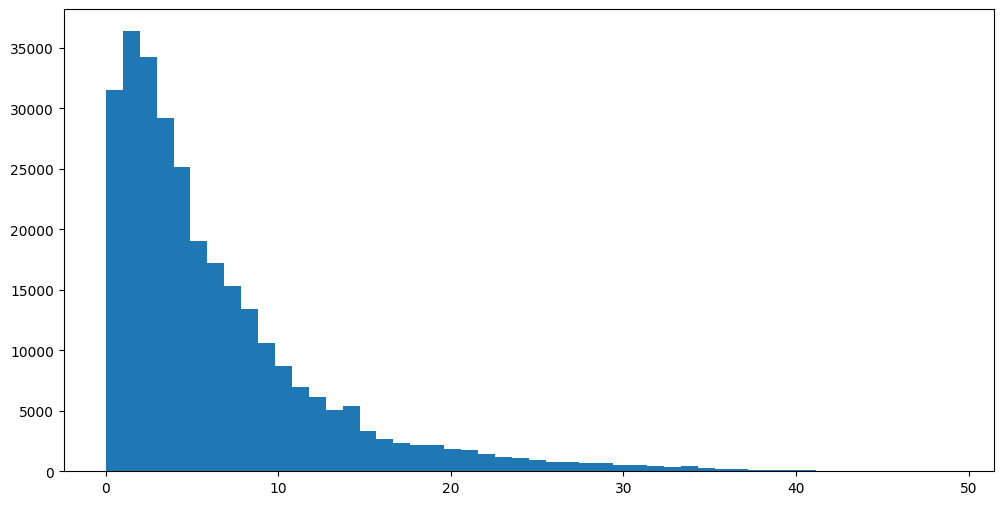

In [39]:
#antigüedad en el trabajo
plt.figure(figsize=(12, 6))
plt.hist(home_credit_risk['YEARS_EMPLOYED'][home_credit_risk['YEARS_EMPLOYED'] < 100], bins=50)

In [40]:
home_credit_risk['DAYS_PST_DUE_MAX']

,DAYS_PST_DUE_MAX
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
48739,0.0
48740,0.0
48741,0.0
48742,0.0


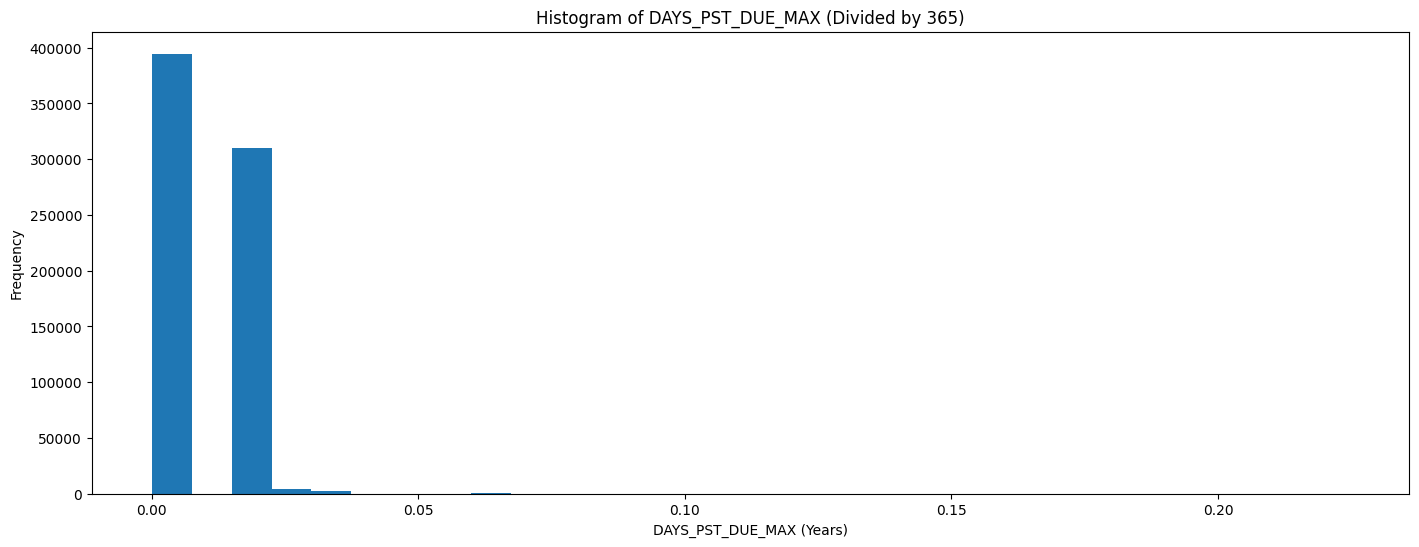

In [41]:
plt.figure(figsize=(17, 6))

# Select the data, divide by 365, and then plot the histogram
plt.hist(home_credit_risk['DAYS_PST_DUE_MAX'][home_credit_risk['DAYS_PST_DUE_MAX']] / 365, bins=30)

plt.xlabel('DAYS_PST_DUE_MAX (Years)')  # Update x-axis label
plt.ylabel('Frequency')
plt.title('Histogram of DAYS_PST_DUE_MAX (Divided by 365)')

plt.show()

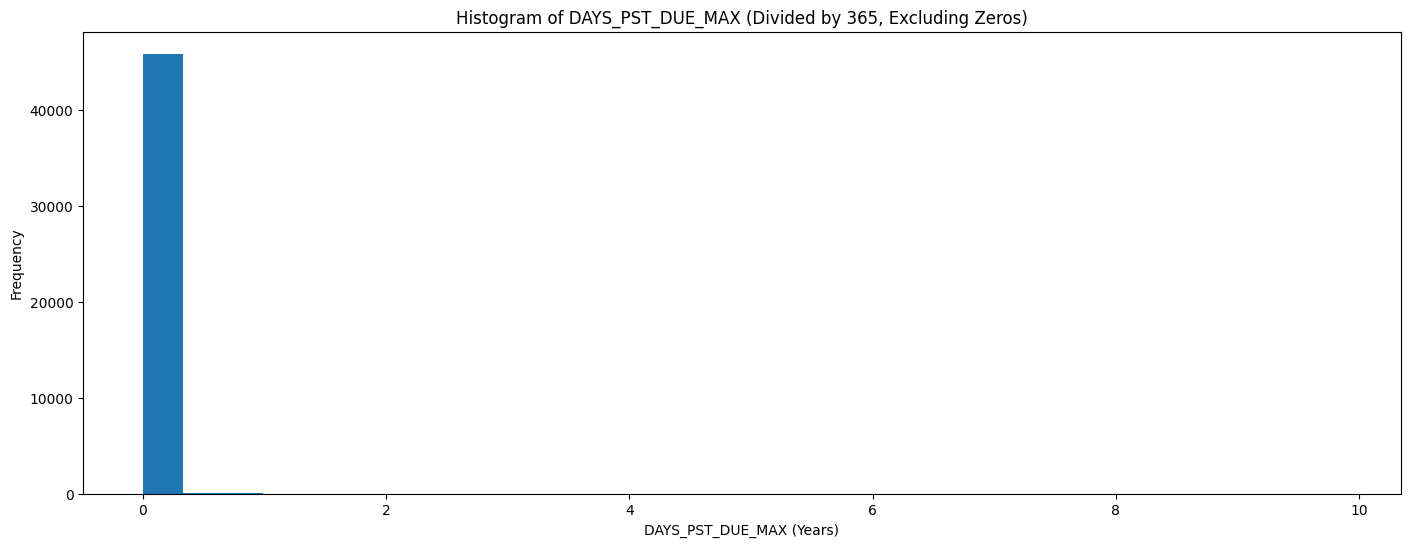

In [42]:
plt.figure(figsize=(17, 6))

# Select data, exclude zeros, divide by 365, and then plot the histogram
data_to_plot = home_credit_risk['DAYS_PST_DUE_MAX'][home_credit_risk['DAYS_PST_DUE_MAX'] != 0] / 365
plt.hist(data_to_plot, bins=30)

plt.xlabel('DAYS_PST_DUE_MAX (Years)')
plt.ylabel('Frequency')
plt.title('Histogram of DAYS_PST_DUE_MAX (Divided by 365, Excluding Zeros)')

plt.show()

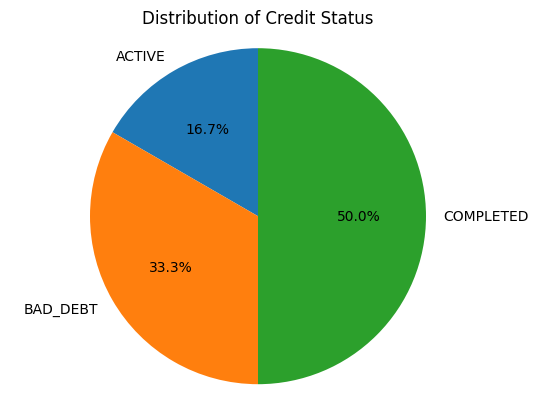

In [43]:

# Sample data (replace with your actual data)
labels = ['ACTIVE', 'BAD_DEBT', 'COMPLETED']
sizes = [15, 30, 45]  # These represent the values for each slice

# Create the pie plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Credit Status')

# Ensure the circle's proportion is correct
plt.axis('equal')

# Display the plot
plt.show()

In [44]:
#el df unido tiene 51 columnas, la misma cantidad que merge_test  y una menos que  merge_train (que contiene la columna TARGET)
merge_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,52,6,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,0.752614,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,4.0,7.0,0.0,-1572.0,3.780000e+05,373239.00,0.0,3.0,0.0,0.0,1,0,0,0,1,6,6,1,1,1,18,28,1
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,49,12,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,0.564990,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,-373.0,5.688000e+05,543087.00,0.0,2.0,0.0,0.0,1,0,1,0,1,6,6,4,1,1,9,42,1
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,54,12,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,0.500000,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,36.0,0.0,19305.0,-2070.0,1.262250e+06,0.00,0.0,0.0,0.0,0.0,1,0,1,1,1,7,6,1,1,1,4,54,1
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,38,5,-2000.0,-4208,1,1,0,1,1,0,4.0,2,2,0.525734,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,24.0,0.0,0.0,-2105.0,3.937500e+05,151015.50,0.0,5.0,0.0,0.0,1,0,0,0,1,6,6,4,1,1,14,5,1
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,35,6,-4000.0,-4262,1,1,1,1,0,0,3.0,2,2,0.202145,0.425687,0.500000,0.0,0.0,0.0,0.0,-821.0,12.0,0.0,0.0,-3000.0,1.089840e+06,0.00,0.0,0.0,0.0,0.0,1,0,1,1,0,6,6,4,1,1,18,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,121500.0,412560.0,17473.5,270000.0,0.002042,54,14,-9094.0,-3399,1,1,1,1,1,0,1.0,3,3,0.500000,0.648575,0.643026,1.0,0.0,1.0,0.0,-684.0,24.0,0.0,17131.5,-1337.0,4.880700e+05,278901.00,0.0,2.0,0.0,0.0,1,0,0,0,1,6,6,4,4,1,18,33,1
48740,456222,2,157500.0,622413.0,31909.5,495000.0,0.035792,30,3,-3015.0,-3003,1,1,0,1,0,0,4.0,2,2,0.500000,0.684596,0.500000,2.0,0.0,2.0,0.0,0.0,24.0,0.0,0.0,-3000.0,1.089840e+06,0.00,0.0,0.0,0.0,0.0,1,0,0,0,0,6,1,4,1,1,14,51,1
48741,456223,1,202500.0,315000.0,33205.5,315000.0,0.026392,43,8,-2681.0,-1504,1,1,0,1,1,0,3.0,2,2,0.733503,0.632770,0.283712,0.0,0.0,0.0,0.0,-838.0,12.0,0.0,0.0,-1017.0,1.932340e+06,21343.50,0.0,1.0,0.0,0.0,0,0,0,1,1,6,1,4,1,1,18,5,1
48742,456224,0,225000.0,450000.0,25128.0,450000.0,0.018850,38,7,-1461.0,-1364,1,1,1,1,1,0,2.0,2,2,0.373090,0.445701,0.595456,0.0,0.0,0.0,0.0,-2308.0,24.0,0.0,6556.5,-2738.0,9.911891e+05,380604.06,0.0,6.0,0.0,0.0,1,0,1,0,0,1,1,1,1,1,10,42,1


In [45]:
home_credit_risk


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,4.500000e+05,245781.00,0.0,2.0,0.0,0.0,1
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,0.500000,1.0,0.0,1.0,0.0,-828.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,8.100000e+05,0.00,0.0,1.0,0.0,0.0,1
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0.500000,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,9.453780e+04,0.00,0.0,0.0,0.0,0.0,1
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0.500000,0.650442,0.500000,2.0,0.0,2.0,0.0,-617.0,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,0.000,-3000.0,9.760041e+05,0.00,0.0,0.0,0.0,0.0,1
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0.500000,0.322738,0.500000,0.0,0.0,0.0,0.0,-1106.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,1.462500e+05,0.00,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,121500.0,412560.0,17473.5,270000.0,0.002042,54,14,-9094.0,-3399,1,1,1,1,1,0,1.0,3,3,0.500000,0.648575,0.643026,1.0,0.0,1.0,0.0,-684.0,0,0,0,1,6,6,4,4,1,18,33,1,24.0,0.0,17131.500,-1337.0,4.880700e+05,278901.00,0.0,2.0,0.0,0.0,1
48740,456222,2,157500.0,622413.0,31909.5,495000.0,0.035792,30,3,-3015.0,-3003,1,1,0,1,0,0,4.0,2,2,0.500000,0.684596,0.500000,2.0,0.0,2.0,0.0,0.0,0,0,0,0,6,1,4,1,1,14,51,1,24.0,0.0,0.000,-3000.0,1.089840e+06,0.00,0.0,0.0,0.0,0.0,1
48741,456223,1,202500.0,315000.0,33205.5,315000.0,0.026392,43,8,-2681.0,-1504,1,1,0,1,1,0,3.0,2,2,0.733503,0.632770,0.283712,0.0,0.0,0.0,0.0,-838.0,0,0,1,1,6,1,4,1,1,18,5,1,12.0,0.0,0.000,-1017.0,1.932340e+06,21343.50,0.0,1.0,0.0,0.0,0
48742,456224,0,225000.0,450000.0,25128.0,450000.0,0.018850,38,7,-1461.0,-1364,1,1,1,1,1,0,2.0,2,2,0.373090,0.445701,0.595456,0.0,0.0,0.0,0.0,-2308.0,0,1,0,0,1,1,1,1,1,10,42,1,24.0,0.0,6556.500,-2738.0,9.911891e+05,380604.06,0.0,6.0,0.0,0.0,1


### MODELADO

In [46]:
from sklearn.cluster import KMeans # For KMeans clustering
from sklearn.preprocessing import StandardScaler # For feature scaling

In [47]:
cols_numericas=['CNT_CHILDREN', 'AMT_INCOME_TOTAL',	'AMT_CREDIT'	,'AMT_ANNUITY'	,'AMT_GOODS_PRICE'	,'REGION_POPULATION_RELATIVE',	'YEARS_OLD',	'YEARS_EMPLOYED',	'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1'	,'EXT_SOURCE_2',	'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'CNT_INSTALMENT_MAX	DAYS_PST_DUE_MAX'	,'AMT_LARGEST_RECORDED_DEBT',	'DAYS_SINCE_LAST_APPLICATION'	,'AMT_CREDIT_MAX'	,'AMT_CREDIT_SUM_DEBT'	,'CNT_CREDIT_PROLONG_MAX'	,'ACTIVE'	,'BAD_DEBT',	'COMPLETED',  'CNT_INSTALMENT_MAX',
 'DAYS_PST_DUE_MAX']

In [48]:
cols_numericas

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'YEARS_OLD',
 'YEARS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'CNT_INSTALMENT_MAX\tDAYS_PST_DUE_MAX',
 'AMT_LARGEST_RECORDED_DEBT',
 'DAYS_SINCE_LAST_APPLICATION',
 'AMT_CREDIT_MAX',
 'AMT_CREDIT_SUM_DEBT',
 'CNT_CREDIT_PROLONG_MAX',
 'ACTIVE',
 'BAD_DEBT',
 'COMPLETED',
 'CNT_INSTALMENT_MAX',
 'DAYS_PST_DUE_MAX']

In [49]:
cols_categoricas=[]
for col in merge_train:
        if not col in cols_numericas:
                cols_categoricas.append(col)

In [50]:
cols_categoricas

['SK_ID_CURR',
 'TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_CONTRACT_TYPE_encoded',
 'CODE_GENDER_encoded',
 'FLAG_OWN_CAR_encoded',
 'FLAG_OWN_REALTY_encoded',
 'NAME_TYPE_SUITE_encoded',
 'NAME_INCOME_TYPE_encoded',
 'NAME_EDUCATION_TYPE_encoded',
 'NAME_FAMILY_STATUS_encoded',
 'NAME_HOUSING_TYPE_encoded',
 'OCCUPATION_TYPE_encoded',
 'ORGANIZATION_TYPE_encoded',
 'DOCUMENT_COUNT',
 'OLD_CAR']

In [51]:
#selección de columnas
all_columns = list(merge_test.columns)

In [52]:
scaler = StandardScaler()
merge_test_scaled = scaler.fit_transform(merge_train)

In [53]:
#cómo se agrupan los solicitantes, sin tener en cuenta el resultado de su solicitud actual
#eliminamos la columna SK_ID_CURR, mantenemos el resto como features para el modelo
home_cred=home_credit_risk.copy()
home_cred.drop('SK_ID_CURR', axis=1, inplace=True)

In [54]:
home_cred

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,4.500000e+05,245781.00,0.0,2.0,0.0,0.0,1
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,0.500000,1.0,0.0,1.0,0.0,-828.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,8.100000e+05,0.00,0.0,1.0,0.0,0.0,1
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0.500000,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,9.453780e+04,0.00,0.0,0.0,0.0,0.0,1
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0.500000,0.650442,0.500000,2.0,0.0,2.0,0.0,-617.0,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,0.000,-3000.0,9.760041e+05,0.00,0.0,0.0,0.0,0.0,1
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0.500000,0.322738,0.500000,0.0,0.0,0.0,0.0,-1106.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,1.462500e+05,0.00,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,121500.0,412560.0,17473.5,270000.0,0.002042,54,14,-9094.0,-3399,1,1,1,1,1,0,1.0,3,3,0.500000,0.648575,0.643026,1.0,0.0,1.0,0.0,-684.0,0,0,0,1,6,6,4,4,1,18,33,1,24.0,0.0,17131.500,-1337.0,4.880700e+05,278901.00,0.0,2.0,0.0,0.0,1
48740,2,157500.0,622413.0,31909.5,495000.0,0.035792,30,3,-3015.0,-3003,1,1,0,1,0,0,4.0,2,2,0.500000,0.684596,0.500000,2.0,0.0,2.0,0.0,0.0,0,0,0,0,6,1,4,1,1,14,51,1,24.0,0.0,0.000,-3000.0,1.089840e+06,0.00,0.0,0.0,0.0,0.0,1
48741,1,202500.0,315000.0,33205.5,315000.0,0.026392,43,8,-2681.0,-1504,1,1,0,1,1,0,3.0,2,2,0.733503,0.632770,0.283712,0.0,0.0,0.0,0.0,-838.0,0,0,1,1,6,1,4,1,1,18,5,1,12.0,0.0,0.000,-1017.0,1.932340e+06,21343.50,0.0,1.0,0.0,0.0,0
48742,0,225000.0,450000.0,25128.0,450000.0,0.018850,38,7,-1461.0,-1364,1,1,1,1,1,0,2.0,2,2,0.373090,0.445701,0.595456,0.0,0.0,0.0,0.0,-2308.0,0,1,0,0,1,1,1,1,1,10,42,1,24.0,0.0,6556.500,-2738.0,9.911891e+05,380604.06,0.0,6.0,0.0,0.0,1


In [55]:
home_cred_scaled=scaler.fit_transform(home_cred)

In [56]:

#wcss = []  # Within-cluster sum of squares
#for i in range(1, 11):  # Try k values from 1 to 10
#    kmeans = KMeans(n_clusters=i, random_state=42)  # Initialize KMeans
#    kmeans.fit(home_cred_scaled)  # Fit the model
#    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS)
#
# Plot the Elbow Method graph
#import matplotlib.pyplot as plt
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of Clusters (k)')
#plt.ylabel('WCSS')
#plt.show()


In [57]:

# Initialize KMeans with the chosen k
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to your data
kmeans.fit(home_cred_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

kmeans_results=home_credit_risk

# Add the cluster labels to your DataFrame
kmeans_results['cluster'] = labels

In [58]:
# Calculate the mean of each feature for each cluster
kmeans_results.groupby('cluster').mean()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,278068.627323,0.496298,177309.902108,600706.044652,28177.937253,539200.252162,0.020939,39.934289,6.123648,-4627.925282,-2804.757202,0.999997,0.999900,0.244572,0.997955,0.275623,0.079021,2.252337,2.042768,2.020758,0.490976,0.516372,0.499117,1.409372,0.138923,1.393064,0.096999,-987.192386,0.090082,0.375412,0.374568,0.677807,5.271942,4.936601,3.111036,1.370814,1.335776,9.494294,23.430466,0.935091,19.836878,1.465477,6020.927898,-1921.620155,1.079786e+06,493674.849391,0.033182,1.802399,0.000055,0.0,0.908223
1,278395.049229,0.045572,137759.256730,529571.429135,24026.249039,475467.616213,0.020818,59.254201,997.446581,-6583.334943,-3889.559206,0.999985,0.002577,0.000062,0.999136,0.292057,0.036096,1.699856,2.085310,2.065695,0.545510,0.508068,0.545328,1.476196,0.161499,1.460408,0.112965,-939.878686,0.053442,0.180821,0.182873,0.762651,5.092810,2.856803,3.503758,1.872822,1.074569,17.994784,56.959228,0.948965,23.075805,1.076714,2538.893973,-2018.948471,5.948406e+05,212502.461465,0.015432,1.624824,0.000077,0.0,0.960323


In [59]:
kmeans_results.groupby('cluster').count()
#solo 64K en el grupo 0 y casi 300K en el grupo 1

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456,291456
1,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799,64799


In [60]:
clustered_target = pd.merge(kmeans_results, merge_train[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')

# 2. Filter out rows with null values in the new column
filtered_df = clustered_target[clustered_target['TARGET'].notnull()]

In [61]:
filtered_df

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR,cluster,TARGET
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,4.500000e+05,245781.0,0.0,2.0,0.0,0.0,1,0,1.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,0.500000,1.0,0.0,1.0,0.0,-828.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,8.100000e+05,0.0,0.0,1.0,0.0,0.0,1,0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0.500000,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,9.453780e+04,0.0,0.0,0.0,0.0,0.0,1,0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0.500000,0.650442,0.500000,2.0,0.0,2.0,0.0,-617.0,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1,0,0.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0.500000,0.322738,0.500000,0.0,0.0,0.0,0.0,-1106.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,1.462500e+05,0.0,0.0,0.0,0.0,0.0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,0,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,0.145570,0.681632,0.500000,0.0,0.0,0.0,0.0,-273.0,0,1,0,0,6,7,4,2,5,14,43,1,8.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1,0,0.0
307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,56,1000,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,0.500000,0.115992,0.500000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,6,3,4,5,1,18,57,1,6.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1,1,0.0
307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,41,21,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,0.744026,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0,0,0,1,6,7,1,2,1,10,39,1,12.0,5.0,0.000,-919.0,2.250000e+06,1624797.0,0.0,2.0,0.0,0.0,1,0,0.0
307509,456254,0,171000.0,370107.0,20205.0,319500.0,0.005313,32,13,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,0.500000,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0,0,0,1,6,1,4,1,1,8,3,1,16.0,0.0,0.000,-1104.0,4.500000e+04,0.0,0.0,0.0,0.0,0.0,1,0,1.0


In [62]:
#constrastando con la variable TARGET
filtered_df.groupby('cluster')

In [63]:
filtered_df.groupby(['cluster', 'TARGET']).size().unstack()


TARGET,0.0,1.0
cluster,,
0,230176,21829
1,52510,2996


#### Una red nueronal densa (solo dos capas ocultas)

In [146]:
merge_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,4.500000e+05,245781.0,0.0,2.0,0.0,0.0,1
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,0.500000,1.0,0.0,1.0,0.0,-828.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,8.100000e+05,0.0,0.0,1.0,0.0,0.0,1
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0.500000,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,9.453780e+04,0.0,0.0,0.0,0.0,0.0,1
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0.500000,0.650442,0.500000,2.0,0.0,2.0,0.0,-617.0,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0.500000,0.322738,0.500000,0.0,0.0,0.0,0.0,-1106.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,1.462500e+05,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,0,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,0.145570,0.681632,0.500000,0.0,0.0,0.0,0.0,-273.0,0,1,0,0,6,7,4,2,5,14,43,1,8.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,56,1000,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,0.500000,0.115992,0.500000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,6,3,4,5,1,18,57,1,6.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,41,21,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,0.744026,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0,0,0,1,6,7,1,2,1,10,39,1,12.0,5.0,0.000,-919.0,2.250000e+06,1624797.0,0.0,2.0,0.0,0.0,1
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,32,13,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,0.500000,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0,0,0,1,6,1,4,1,1,8,3,1,16.0,0.0,0.000,-1104.0,4.500000e+04,0.0,0.0,0.0,0.0,0.0,1


In [147]:
x_train=merge_train.copy()

In [148]:
x_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,4.500000e+05,245781.0,0.0,2.0,0.0,0.0,1
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,0.500000,1.0,0.0,1.0,0.0,-828.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,8.100000e+05,0.0,0.0,1.0,0.0,0.0,1
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0.500000,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,9.453780e+04,0.0,0.0,0.0,0.0,0.0,1
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0.500000,0.650442,0.500000,2.0,0.0,2.0,0.0,-617.0,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0.500000,0.322738,0.500000,0.0,0.0,0.0,0.0,-1106.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,1.462500e+05,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,0,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,0.145570,0.681632,0.500000,0.0,0.0,0.0,0.0,-273.0,0,1,0,0,6,7,4,2,5,14,43,1,8.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,56,1000,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,0.500000,0.115992,0.500000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,6,3,4,5,1,18,57,1,6.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,41,21,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,0.744026,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0,0,0,1,6,7,1,2,1,10,39,1,12.0,5.0,0.000,-919.0,2.250000e+06,1624797.0,0.0,2.0,0.0,0.0,1
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,32,13,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,0.500000,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0,0,0,1,6,1,4,1,1,8,3,1,16.0,0.0,0.000,-1104.0,4.500000e+04,0.0,0.0,0.0,0.0,0.0,1


In [149]:
y_train=x_train['TARGET'].copy()
x_train.drop(['TARGET', 'SK_ID_CURR'], axis=1, inplace=True)

In [150]:
x_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,4.500000e+05,245781.0,0.0,2.0,0.0,0.0,1
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,0.500000,1.0,0.0,1.0,0.0,-828.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,8.100000e+05,0.0,0.0,1.0,0.0,0.0,1
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0.500000,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,9.453780e+04,0.0,0.0,0.0,0.0,0.0,1
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0.500000,0.650442,0.500000,2.0,0.0,2.0,0.0,-617.0,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0.500000,0.322738,0.500000,0.0,0.0,0.0,0.0,-1106.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,1.462500e+05,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,0,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,0.145570,0.681632,0.500000,0.0,0.0,0.0,0.0,-273.0,0,1,0,0,6,7,4,2,5,14,43,1,8.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,56,1000,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,0.500000,0.115992,0.500000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,6,3,4,5,1,18,57,1,6.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,41,21,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,0.744026,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0,0,0,1,6,7,1,2,1,10,39,1,12.0,5.0,0.000,-919.0,2.250000e+06,1624797.0,0.0,2.0,0.0,0.0,1
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,32,13,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,0.500000,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0,0,0,1,6,1,4,1,1,8,3,1,16.0,0.0,0.000,-1104.0,4.500000e+04,0.0,0.0,0.0,0.0,0.0,1


In [151]:
x_test=merge_test.copy()
x_test.drop('SK_ID_CURR', axis=1, inplace=True)
x_merge_test=x_test.copy()

In [154]:
#no tenemos informacion de TARGET del df merge_test
y_test=[]

In [71]:
x_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT
0,0,135000.0,568800.0,20560.5,450000.0,0.018850,52,6,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,0.752614,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,4.0,7.0,0.0,-1572.0,3.780000e+05,373239.00,0.0,3.0,0.0,0.0,1,0,0,0,1,6,6,1,1,1,18,28,1
1,0,99000.0,222768.0,17370.0,180000.0,0.035792,49,12,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,0.564990,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,-373.0,5.688000e+05,543087.00,0.0,2.0,0.0,0.0,1,0,1,0,1,6,6,4,1,1,9,42,1
2,0,202500.0,663264.0,69777.0,630000.0,0.019101,54,12,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,0.500000,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,36.0,0.0,19305.0,-2070.0,1.262250e+06,0.00,0.0,0.0,0.0,0.0,1,0,1,1,1,7,6,1,1,1,4,54,1
3,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,38,5,-2000.0,-4208,1,1,0,1,1,0,4.0,2,2,0.525734,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,24.0,0.0,0.0,-2105.0,3.937500e+05,151015.50,0.0,5.0,0.0,0.0,1,0,0,0,1,6,6,4,1,1,14,5,1
4,1,180000.0,625500.0,32067.0,625500.0,0.010032,35,6,-4000.0,-4262,1,1,1,1,0,0,3.0,2,2,0.202145,0.425687,0.500000,0.0,0.0,0.0,0.0,-821.0,12.0,0.0,0.0,-3000.0,1.089840e+06,0.00,0.0,0.0,0.0,0.0,1,0,1,1,0,6,6,4,1,1,18,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,121500.0,412560.0,17473.5,270000.0,0.002042,54,14,-9094.0,-3399,1,1,1,1,1,0,1.0,3,3,0.500000,0.648575,0.643026,1.0,0.0,1.0,0.0,-684.0,24.0,0.0,17131.5,-1337.0,4.880700e+05,278901.00,0.0,2.0,0.0,0.0,1,0,0,0,1,6,6,4,4,1,18,33,1
48740,2,157500.0,622413.0,31909.5,495000.0,0.035792,30,3,-3015.0,-3003,1,1,0,1,0,0,4.0,2,2,0.500000,0.684596,0.500000,2.0,0.0,2.0,0.0,0.0,24.0,0.0,0.0,-3000.0,1.089840e+06,0.00,0.0,0.0,0.0,0.0,1,0,0,0,0,6,1,4,1,1,14,51,1
48741,1,202500.0,315000.0,33205.5,315000.0,0.026392,43,8,-2681.0,-1504,1,1,0,1,1,0,3.0,2,2,0.733503,0.632770,0.283712,0.0,0.0,0.0,0.0,-838.0,12.0,0.0,0.0,-1017.0,1.932340e+06,21343.50,0.0,1.0,0.0,0.0,0,0,0,1,1,6,1,4,1,1,18,5,1
48742,0,225000.0,450000.0,25128.0,450000.0,0.018850,38,7,-1461.0,-1364,1,1,1,1,1,0,2.0,2,2,0.373090,0.445701,0.595456,0.0,0.0,0.0,0.0,-2308.0,24.0,0.0,6556.5,-2738.0,9.911891e+05,380604.06,0.0,6.0,0.0,0.0,1,0,1,0,0,1,1,1,1,1,10,42,1


In [155]:
y_train

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
307506,0
307507,0
307508,0
307509,1


In [156]:
cols_numericas

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'YEARS_OLD',
 'YEARS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'CNT_INSTALMENT_MAX',
 'DAYS_PST_DUE_MAX',
 'DOCUMENT_COUNT']

In [157]:
cols_numericas=['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_OLD', 'YEARS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1','CNT_INSTALMENT_MAX', 'DAYS_PST_DUE_MAX','DOCUMENT_COUNT']

In [158]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train[cols_numericas] = scaler.fit_transform(x_train[cols_numericas]) # Use cols_numericas instead of cols
x_test[cols_numericas] = scaler.transform(x_test[cols_numericas]) # Use cols_numericas instead of COL_NUMERICAS

In [159]:
cols_categoricas.remove('TARGET')
cols_categoricas.remove('SK_ID_CURR')

ValueError: list.remove(x): x not in list

In [77]:
#cols_categoricas.remove('DOCUMENT_COUNT')

No hay suficiente memoria para codificar las columnas categóricas con Get Dummies, no puedo proceder con el modelado

In [78]:
cols_categoricas=[ 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'REGION_POPULATION_RELATIVE', 'NAME_CONTRACT_TYPE_encoded', 'CODE_GENDER_encoded', 'FLAG_OWN_CAR_encoded','FLAG_OWN_REALTY_encoded', 'NAME_TYPE_SUITE_encoded','NAME_INCOME_TYPE_encoded', 'NAME_EDUCATION_TYPE_encoded','NAME_FAMILY_STATUS_encoded', 'NAME_HOUSING_TYPE_encoded','OCCUPATION_TYPE_encoded', 'ORGANIZATION_TYPE_encoded', 'OLD_CAR']

In [160]:
x_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
0,0.0,0.001512,0.090287,0.095729,0.086667,0.018801,0.102041,0.001,0.852140,0.705433,1,1,0,1,1,0,0.05,2,2,0.072215,0.262949,0.139376,0.005747,0.058824,0.005814,0.083333,-1134.0,0,1,0,1,6,7,4,3,1,8,5,0.25,0.277108,0.000000,5043.645,-1437.0,4.500000e+05,245781.0,0.0,2.0,0.0,0.0,1
1,0.0,0.002089,0.311736,0.138353,0.278889,0.003541,0.510204,0.003,0.951929,0.959566,1,1,0,1,1,0,0.10,1,1,0.312933,0.622246,0.500000,0.002874,0.000000,0.002907,0.000000,-828.0,0,0,0,0,1,4,1,1,1,3,39,0.25,0.132530,0.000000,0.000,-2586.0,8.100000e+05,0.0,0.0,1.0,0.0,0.0,1
2,0.0,0.000358,0.022472,0.026160,0.033333,0.010032,0.653061,0.000,0.827335,0.648326,1,1,1,1,1,0,0.05,2,2,0.511992,0.555912,0.729567,0.000000,0.000000,0.000000,0.000000,-815.0,1,1,1,1,6,7,4,3,1,8,11,0.00,0.036145,0.000000,0.000,-1326.0,9.453780e+04,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.000935,0.066837,0.115053,0.073333,0.008019,0.653061,0.008,0.601451,0.661387,1,1,0,1,0,0,0.10,2,2,0.511992,0.650442,0.500000,0.005747,0.000000,0.005814,0.000000,-617.0,0,0,0,1,6,7,4,0,1,8,5,0.25,0.566265,0.000000,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.000819,0.116854,0.084742,0.126667,0.028663,0.693878,0.008,0.825268,0.519522,1,1,0,1,0,0,0.05,2,2,0.511992,0.322738,0.500000,0.000000,0.000000,0.000000,0.000000,-1106.0,0,1,0,1,6,7,4,3,1,3,37,0.25,0.277108,0.000000,0.000,-1149.0,1.462500e+05,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.001127,0.052360,0.106803,0.055556,0.032561,0.102041,0.000,0.657263,0.724607,1,1,0,1,0,0,0.05,1,1,0.138170,0.681632,0.500000,0.000000,0.000000,0.000000,0.000000,-273.0,0,1,0,0,6,7,4,2,5,14,43,0.25,0.084337,0.000000,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307507,0.0,0.000396,0.056067,0.046513,0.055556,0.025164,0.734694,1.000,0.822147,0.431708,1,0,0,1,1,0,0.05,2,2,0.511992,0.115992,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,1,6,3,4,5,1,18,57,0.25,0.060241,0.000000,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307508,0.0,0.001089,0.157969,0.116186,0.144444,0.005002,0.428571,0.021,0.726937,0.284424,1,1,0,1,0,1,0.05,3,3,0.769370,0.535722,0.218859,0.017241,0.000000,0.017442,0.000000,-1909.0,0,0,0,1,6,7,1,2,1,10,39,0.25,0.132530,0.001482,0.000,-919.0,2.250000e+06,1624797.0,0.0,2.0,0.0,0.0,1
307509,0.0,0.001243,0.081175,0.078306,0.078889,0.005313,0.244898,0.013,0.896158,0.870641,1,1,0,1,0,0,0.10,2,2,0.511992,0.514163,0.661024,0.000000,0.000000,0.000000,0.000000,-322.0,0,0,0,1,6,1,4,1,1,8,3,0.25,0.180723,0.000000,0.000,-1104.0,4.500000e+04,0.0,0.0,0.0,0.0,0.0,1


In [168]:
x_train_dummies = pd.get_dummies(x_train, columns=cols_categoricas, sparse=True)
x_test_dummies = pd.get_dummies(x_test, columns=cols_categoricas, sparse=True)

In [169]:
x_train_dummies, x_test_dummies = x_train_dummies.align(x_test_dummies, join='outer', axis=1, fill_value=0)


In [170]:
x_train_dummies.shape

(307511, 252)

In [171]:
x_merge_train=x_train.copy()
y_merge_train=y_train.copy()
x_merge_teste=x_test.copy()
y_merge_test=y_test.copy()

In [164]:
from imblearn.over_sampling import SMOTE

In [165]:
smote = SMOTE(random_state=42)
x_train_dummies_resampled, y_train_resampled = smote.fit_resample(x_train_dummies, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [85]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, confusion_matrix

In [86]:


#model = keras.Sequential([
#    layers.Dense(64, activation='relu', input_shape=(x_train_dummies.shape[1],)), # Dynamic input shape
#    layers.Dense(64, activation='relu'),
#    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
#])

#model.compile(optimizer='adam',
#              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
#              metrics=['accuracy'])

# Train the model
#model.fit(x_train_dummies_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

In [87]:
# 4. Make predictions
#predictions = model.predict(x_test_dummies)

In [88]:
x_train_dummies_resampled

,ACTIVE,AMT_ANNUITY,AMT_CREDIT,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_LARGEST_RECORDED_DEBT,BAD_DEBT,CNT_CHILDREN,CNT_CREDIT_PROLONG_MAX,CNT_FAM_MEMBERS,CNT_INSTALMENT_MAX,CODE_GENDER_encoded_0,CODE_GENDER_encoded_1,CODE_GENDER_encoded_2,COMPLETED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_PST_DUE_MAX,DAYS_REGISTRATION,DAYS_SINCE_LAST_APPLICATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DOCUMENT_COUNT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE_0,FLAG_CONT_MOBILE_1,FLAG_EMAIL_0,FLAG_EMAIL_1,FLAG_EMP_PHONE_0,FLAG_EMP_PHONE_1,FLAG_MOBIL_0,FLAG_MOBIL_1,FLAG_OWN_CAR_encoded_0,FLAG_OWN_CAR_encoded_1,FLAG_OWN_REALTY_encoded_0,FLAG_OWN_REALTY_encoded_1,FLAG_PHONE_0,FLAG_PHONE_1,FLAG_WORK_PHONE_0,FLAG_WORK_PHONE_1,NAME_CONTRACT_TYPE_encoded_0,NAME_CONTRACT_TYPE_encoded_1,NAME_EDUCATION_TYPE_encoded_0,NAME_EDUCATION_TYPE_encoded_1,NAME_EDUCATION_TYPE_encoded_2,NAME_EDUCATION_TYPE_encoded_3,NAME_EDUCATION_TYPE_encoded_4,NAME_FAMILY_STATUS_encoded_0,NAME_FAMILY_STATUS_encoded_1,NAME_FAMILY_STATUS_encoded_2,NAME_FAMILY_STATUS_encoded_3,NAME_FAMILY_STATUS_encoded_4,NAME_FAMILY_STATUS_encoded_5,NAME_HOUSING_TYPE_encoded_0,NAME_HOUSING_TYPE_encoded_1,NAME_HOUSING_TYPE_encoded_2,NAME_HOUSING_TYPE_encoded_3,NAME_HOUSING_TYPE_encoded_4,NAME_HOUSING_TYPE_encoded_5,NAME_INCOME_TYPE_encoded_0,NAME_INCOME_TYPE_encoded_1,NAME_INCOME_TYPE_encoded_2,NAME_INCOME_TYPE_encoded_3,NAME_INCOME_TYPE_encoded_4,NAME_INCOME_TYPE_encoded_5,NAME_INCOME_TYPE_encoded_6,NAME_INCOME_TYPE_encoded_7,NAME_TYPE_SUITE_encoded_0,NAME_TYPE_SUITE_encoded_1,NAME_TYPE_SUITE_encoded_2,NAME_TYPE_SUITE_encoded_3,NAME_TYPE_SUITE_encoded_4,NAME_TYPE_SUITE_encoded_5,NAME_TYPE_SUITE_encoded_6,NAME_TYPE_SUITE_encoded_7,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_encoded_0,OCCUPATION_TYPE_encoded_1,OCCUPATION_TYPE_encoded_10,OCCUPATION_TYPE_encoded_11,OCCUPATION_TYPE_encoded_12,OCCUPATION_TYPE_encoded_13,OCCUPATION_TYPE_encoded_14,OCCUPATION_TYPE_encoded_15,OCCUPATION_TYPE_encoded_16,OCCUPATION_TYPE_encoded_17,OCCUPATION_TYPE_encoded_18,OCCUPATION_TYPE_encoded_2,OCCUPATION_TYPE_encoded_3,OCCUPATION_TYPE_encoded_4,OCCUPATION_TYPE_encoded_5,OCCUPATION_TYPE_encoded_6,OCCUPATION_TYPE_encoded_7,OCCUPATION_TYPE_encoded_8,OCCUPATION_TYPE_encoded_9,OLD_CAR_0,OLD_CAR_1,ORGANIZATION_TYPE_encoded_0,ORGANIZATION_TYPE_encoded_1,ORGANIZATION_TYPE_encoded_10,ORGANIZATION_TYPE_encoded_11,ORGANIZATION_TYPE_encoded_12,ORGANIZATION_TYPE_encoded_13,ORGANIZATION_TYPE_encoded_14,ORGANIZATION_TYPE_encoded_15,ORGANIZATION_TYPE_encoded_16,ORGANIZATION_TYPE_encoded_17,ORGANIZATION_TYPE_encoded_18,ORGANIZATION_TYPE_encoded_19,ORGANIZATION_TYPE_encoded_2,ORGANIZATION_TYPE_encoded_20,ORGANIZATION_TYPE_encoded_21,ORGANIZATION_TYPE_encoded_22,ORGANIZATION_TYPE_encoded_23,ORGANIZATION_TYPE_encoded_24,ORGANIZATION_TYPE_encoded_25,ORGANIZATION_TYPE_encoded_26,ORGANIZATION_TYPE_encoded_27,ORGANIZATION_TYPE_encoded_28,ORGANIZATION_TYPE_encoded_29,ORGANIZATION_TYPE_encoded_3,ORGANIZATION_TYPE_encoded_30,ORGANIZATION_TYPE_encoded_31,ORGANIZATION_TYPE_encoded_32,ORGANIZATION_TYPE_encoded_33,ORGANIZATION_TYPE_encoded_34,ORGANIZATION_TYPE_encoded_35,ORGANIZATION_TYPE_encoded_36,ORGANIZATION_TYPE_encoded_37,ORGANIZATION_TYPE_encoded_38,ORGANIZATION_TYPE_encoded_39,ORGANIZATION_TYPE_encoded_4,ORGANIZATION_TYPE_encoded_40,ORGANIZATION_TYPE_encoded_41,ORGANIZATION_TYPE_encoded_42,ORGANIZATION_TYPE_encoded_43,ORGANIZATION_TYPE_encoded_44,ORGANIZATION_TYPE_encoded_45,ORGANIZATION_TYPE_encoded_46,ORGANIZATION_TYPE_encoded_47,ORGANIZATION_TYPE_encoded_48,ORGANIZATION_TYPE_encoded_49,ORGANIZATION_TYPE_encoded_5,ORGANIZATION_TYPE_encoded_50,ORGANIZATION_TYPE_encoded_51,ORGANIZATION_TYPE_encoded_52,ORGANIZATION_TYPE_encoded_53,ORGANIZATION_TYPE_encoded_54,ORGANIZATION_TYPE_encoded_55,ORGANIZATION_TYPE_encoded_56,ORGANIZATION_TYPE_encoded_57,ORGANIZATION_TYPE_encoded_6,ORGANIZATION_TYPE_encoded_7,ORGANIZATION_TYPE_encoded_8,ORGANIZATION_TYPE_encoded_9,REGION_POP

In [89]:
y_train_resampled

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
565367,1
565368,1
565369,1
565370,1


In [90]:

#results_df = pd.DataFrame({'Predicted_Probability': predictions.flatten(),
#                           'Predicted_Class': predicted_classes.flatten()})
#print(results_df)

##### REGRESIÓN LOGÍSTICA

para los siguientes dos modelos, el df de entrenamiento, con variables categóricas codificadas y numéricas procesadas + clases balanceada, se divide

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    x_train_dummies_resampled, y_train_resampled, test_size=0.2, random_state=42
)

# 2. Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# 3. Train the model
model.fit(X_train, y_train)




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### RESULTADOS

In [92]:
# 4. Make predictions on the original test set (x_test_dummies)
predictions_lr = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [93]:
predictions_lr

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [95]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, predictions_lr)
print(f"Accuracy: {accuracy}")

# Calculate Precision
precision = precision_score(y_test, predictions_lr)
print(f"Precision: {precision}")

# Calculate Recall
recall = recall_score(y_test, predictions_lr)
print(f"Recall: {recall}")

# Calculate F1 score
f1 = f1_score(y_test, predictions_lr)  # Assuming you have y_test (true labels)
print(f"F1 Score: {f1}")

# Calculate AUC
auc = roc_auc_score(y_test, predictions_lr)
print(f"AUC: {auc}")

# Create confusion matrix
cm = confusion_matrix(y_test, predictions_lr)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.857492814503648
Precision: 0.8622506586375611
Recall: 0.8509347530023523
F1 Score: 0.856555333998006
AUC: 0.8574929885006102
Confusion Matrix:
[[48850  7686]
 [ 8428 48111]]


In [96]:
merge_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,52,6,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,0.752614,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,4.0,7.0,0.0,-1572.0,3.780000e+05,373239.00,0.0,3.0,0.0,0.0,1,0,0,0,1,6,6,1,1,1,18,28,1
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,49,12,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,0.564990,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,-373.0,5.688000e+05,543087.00,0.0,2.0,0.0,0.0,1,0,1,0,1,6,6,4,1,1,9,42,1
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,54,12,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,0.500000,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,36.0,0.0,19305.0,-2070.0,1.262250e+06,0.00,0.0,0.0,0.0,0.0,1,0,1,1,1,7,6,1,1,1,4,54,1
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,38,5,-2000.0,-4208,1,1,0,1,1,0,4.0,2,2,0.525734,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,24.0,0.0,0.0,-2105.0,3.937500e+05,151015.50,0.0,5.0,0.0,0.0,1,0,0,0,1,6,6,4,1,1,14,5,1
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,35,6,-4000.0,-4262,1,1,1,1,0,0,3.0,2,2,0.202145,0.425687,0.500000,0.0,0.0,0.0,0.0,-821.0,12.0,0.0,0.0,-3000.0,1.089840e+06,0.00,0.0,0.0,0.0,0.0,1,0,1,1,0,6,6,4,1,1,18,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,121500.0,412560.0,17473.5,270000.0,0.002042,54,14,-9094.0,-3399,1,1,1,1,1,0,1.0,3,3,0.500000,0.648575,0.643026,1.0,0.0,1.0,0.0,-684.0,24.0,0.0,17131.5,-1337.0,4.880700e+05,278901.00,0.0,2.0,0.0,0.0,1,0,0,0,1,6,6,4,4,1,18,33,1
48740,456222,2,157500.0,622413.0,31909.5,495000.0,0.035792,30,3,-3015.0,-3003,1,1,0,1,0,0,4.0,2,2,0.500000,0.684596,0.500000,2.0,0.0,2.0,0.0,0.0,24.0,0.0,0.0,-3000.0,1.089840e+06,0.00,0.0,0.0,0.0,0.0,1,0,0,0,0,6,1,4,1,1,14,51,1
48741,456223,1,202500.0,315000.0,33205.5,315000.0,0.026392,43,8,-2681.0,-1504,1,1,0,1,1,0,3.0,2,2,0.733503,0.632770,0.283712,0.0,0.0,0.0,0.0,-838.0,12.0,0.0,0.0,-1017.0,1.932340e+06,21343.50,0.0,1.0,0.0,0.0,0,0,0,1,1,6,1,4,1,1,18,5,1
48742,456224,0,225000.0,450000.0,25128.0,450000.0,0.018850,38,7,-1461.0,-1364,1,1,1,1,1,0,2.0,2,2,0.373090,0.445701,0.595456,0.0,0.0,0.0,0.0,-2308.0,24.0,0.0,6556.5,-2738.0,9.911891e+05,380604.06,0.0,6.0,0.0,0.0,1,0,1,0,0,1,1,1,1,1,10,42,1


In [97]:
scaler = MinMaxScaler()
merge_test[cols_numericas] = scaler.fit_transform(merge_test[cols_numericas]) # Use cols_numericas instead of cols

In [98]:
merge_test_dummies = pd.get_dummies(merge_test, columns=cols_categoricas, sparse=True)

In [99]:
merge_test_dummies.drop('SK_ID_CURR', axis=1, inplace=True)

In [100]:
merge_test_dummies

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,DOCUMENT_COUNT,FLAG_MOBIL_0,FLAG_MOBIL_1,FLAG_EMP_PHONE_0,FLAG_EMP_PHONE_1,FLAG_WORK_PHONE_0,FLAG_WORK_PHONE_1,FLAG_CONT_MOBILE_0,FLAG_CONT_MOBILE_1,FLAG_PHONE_0,FLAG_PHONE_1,FLAG_EMAIL_0,FLAG_EMAIL_1,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_-1,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,REGION_POPULATION_RELATIVE_0.0002529999999999,REGION_POPULATION_RELATIVE_0.000533,REGION_POPULATION_RELATIVE_0.000938,REGION_POPULATION_RELATIVE_0.001276,REGION_POPULATION_RELATIVE_0.001333,REGION_POPULATION_RELATIVE_0.001417,REGION_POPULATION_RELATIVE_0.002042,REGION_POPULATION_RELATIVE_0.002134,REGION_POPULATION_RELATIVE_0.002506,REGION_POPULATION_RELATIVE_0.003069,REGION_POPULATION_RELATIVE_0.0031219999999999,REGION_POPULATION_RELATIVE_0.0035409999999999,REGION_POPULATION_RELATIVE_0.003813,REGION_POPULATION_RELATIVE_0.0038179999999999,REGION_POPULATION_RELATIVE_0.004849,REGION_POPULATION_RELATIVE_0.00496,REGION_POPULATION_RELATIVE_0.005002,REGION_POPULATION_RELATIVE_0.005084,REGION_POPULATION_RELATIVE_0.005144,REGION_POPULATION_RELATIVE_0.005313,REGION_POPULATION_RELATIVE_0.0060079999999999,REGION_POPULATION_RELATIVE_0.006207,REGION_POPULATION_RELATIVE_0.006233,REGION_POPULATION_RELATIVE_0.006296,REGION_POPULATION_RELATIVE_0.006305,REGION_POPULATION_RELATIVE_0.006629,REGION_POPULATION_RELATIVE_0.0066709999999999,REGION_POPULATION_RELATIVE_0.006852,REGION_POPULATION_RELATIVE_0.00702,REGION_POPULATION_RELATIVE_0.007114,REGION_POPULATION_RELATIVE_0.00712,REGION_POPULATION_RELATIVE_0.0072739999999999,REGION_POPULATION_RELATIVE_0.007305,REGION_POPULATION_RELATIVE_0.00733,REGION_POPULATION_RELATIVE_0.008019,REGION_POPULATION_RELATIVE_0.008068,REGION_POPULATION_RELATIVE_0.00823,REGION_POPULATION_RELATIVE_0.0084739999999999,REGION_POPULATION_RELATIVE_0.008575,REGION_POPULATION_RELATIVE_0.008625,REGION_POPULATION_RELATIVE_0.0088659999999999,REGION_POPULATION_RELATIVE_0.009175,REGION_POPULATION_RELATIVE_0.009334,REGION_POPULATION_RELATIVE_0.009549,REGION_POPULATION_RELATIVE_0.00963,REGION_POPULATION_RELATIVE_0.0096569999999999,REGION_POPULATION_RELATIVE_0.010006,REGION_POPULATION_RELATIVE_0.010032,REGION_POPULATION_RELATIVE_0.010147,REGION_POPULATION_RELATIVE_0.010276,REGION_POPULATION_RELATIVE_0.0105,REGION_POPULATION_RELATIVE_0.010556,REGION_POPULATION_RELATIVE_0.010643,REGION_POPULATION_RELATIVE_0.010966,REGION_POPULATION_RELATIVE_0.0116569999999999,REGION_POPULATION_RELATIVE_0.011703,REGION_POPULATION_RELATIVE_0.014464,REGION_POPULATION_RELATIVE_0.0145199999999999,REGION_POPULATION_RELATIVE_0.015221,REGION_POPULATION_RELATIVE_0.016612,REGION_POPULATION_RELATIVE_0.018029,REGION_POPULATION_RELATIVE_0.018209,REGION_POPULATION_RELATIVE_0.018634,REGION_POPULATION_RELATIVE_0.018801,REGION_POPULATION_RELATIVE_0.01885,REGION_POPULATION_RELATIVE_0.019101,REGION_POPULATION_RELATIVE_0.0196889999999999,REGION_POPULATION_RELATIVE_0.020246,REGION_POPULATION_RELATIVE_0.020713,REGION_POPULATION_RELATIVE_0.022625,REGION_POPULATION_RELATIVE_0.0228,REGION_POPULATION_RELATIVE_0.02461,REGION_POPULATION_RELATIVE_0.025164,REGION_POPULATION_RELATIVE_0.026392,REGION_POPULATION_RELATIVE_0.028663,REGION_POPULATION_RELATIVE_0.030755,REGION_POPULATION_RELATIVE_0.031329,REGION_POPULATION_RELATIVE_0.032561,REGION_POPULATION_RELATIVE_0.035792,REGION_POPULATION_RELATIVE_0.04622,REGION_POPULATION_RELATIVE_0.072508,NAME_CONTRACT_TYPE_encoded_0,NAME_CONTRACT_TYPE_encoded_1,CODE_GENDER_encoded_0,CODE_GENDER_enc

In [101]:
missing_cols = set(x_train_dummies.columns) - set(merge_test_dummies.columns)
missing_cols

{'CODE_GENDER_encoded_2',
 'NAME_FAMILY_STATUS_encoded_5',
 'NAME_INCOME_TYPE_encoded_7',
 'REGION_POPULATION_RELATIVE_0.00029'}

In [104]:
# 1. Drop columns not in x_train_dummies_resampled
merge_test_dummies = merge_test_dummies.drop(columns=set(merge_test_dummies.columns) - set(x_train_dummies_resampled.columns), inplace=False)


# 2. Add missing columns and fill with False
missing_cols = set(x_train_dummies_resampled.columns) - set(merge_test_dummies.columns)
for col in missing_cols:
    merge_test_dummies[col] = False

# 3. Reorder columns to match x_train_dummies_resampled (optional but recommended)
merge_test_dummies = merge_test_dummies[x_train_dummies_resampled.columns]

In [105]:
predictions = model.predict(merge_test_dummies)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [106]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
merge_test['predictions'] = predictions

In [108]:
merge_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,predictions
0,100001,0.00,0.024654,0.238037,0.113861,0.184049,0.018850,0.653061,0.006,0.782059,0.872086,1,1,0,1,0,1,0.05,2,2,0.798495,0.789654,0.159520,0.000000,0.0,0.000000,0.0,-1740.0,0.032967,0.001947,0.0,-1572.0,3.780000e+05,373239.00,0.0,3.0,0.0,0.0,1,0,0,0,1,6,6,1,1,1,18,28,1.0,0
1,100005,0.00,0.016440,0.080785,0.096192,0.061350,0.035792,0.591837,0.012,0.615631,0.744329,1,1,0,1,0,0,0.05,2,2,0.595809,0.291656,0.432962,0.000000,0.0,0.000000,0.0,0.0,0.120879,0.000000,0.0,-373.0,5.688000e+05,543087.00,0.0,2.0,0.0,0.0,1,0,1,0,1,6,6,4,1,1,9,42,1.0,0
2,100013,0.00,0.040054,0.280965,0.386413,0.265849,0.019101,0.693878,0.012,0.908313,0.448173,1,1,0,1,0,0,0.05,2,2,0.525601,0.699787,0.610991,0.000000,0.0,0.000000,0.0,-856.0,0.384615,0.000000,19305.0,-2070.0,1.262250e+06,0.00,0.0,0.0,0.0,0.0,1,0,1,1,1,7,6,1,1,1,4,54,1.0,0
3,100028,0.10,0.065721,0.695297,0.271456,0.695297,0.026392,0.367347,0.005,0.915690,0.337114,1,1,0,1,1,0,0.15,2,2,0.553401,0.509677,0.612704,0.000000,0.0,0.000000,0.0,-1805.0,0.252747,0.000000,0.0,-2105.0,3.937500e+05,151015.50,0.0,5.0,0.0,0.0,1,0,0,0,1,6,6,4,1,1,14,5,1.0,0
4,100038,0.05,0.034920,0.263804,0.177582,0.263804,0.010032,0.306122,0.006,0.831380,0.328607,1,1,1,1,0,0,0.10,2,2,0.203835,0.425687,0.500000,0.000000,0.0,0.000000,0.0,-821.0,0.120879,0.000000,0.0,-3000.0,1.089840e+06,0.00,0.0,0.0,0.0,0.0,1,0,1,1,0,6,6,4,1,1,18,5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0.00,0.021574,0.167035,0.096765,0.102249,0.002042,0.693878,0.014,0.616643,0.464556,1,1,1,1,1,0,0.00,3,3,0.525601,0.648575,0.643026,0.002825,0.0,0.002849,0.0,-684.0,0.252747,0.000000,17131.5,-1337.0,4.880700e+05,278901.00,0.0,2.0,0.0,0.0,1,0,0,0,1,6,6,4,4,1,18,33,1.0,0
48740,456222,0.10,0.029787,0.262401,0.176710,0.204499,0.035792,0.204082,0.003,0.872903,0.526938,1,1,0,1,0,0,0.15,2,2,0.525601,0.684596,0.500000,0.005650,0.0,0.005698,0.0,0.0,0.252747,0.000000,0.0,-3000.0,1.089840e+06,0.00,0.0,0.0,0.0,0.0,1,0,0,0,0,6,1,4,1,1,14,51,1.0,0
48741,456223,0.05,0.040054,0.122699,0.183887,0.122699,0.026392,0.469388,0.008,0.886983,0.763075,1,1,0,1,1,0,0.10,2,2,0.777850,0.632770,0.283712,0.000000,0.0,0.000000,0.0,-838.0,0.120879,0.000000,0.0,-1017.0,1.932340e+06,21343.50,0.0,1.0,0.0,0.0,0,0,0,1,1,6,1,4,1,1,18,5,1.0,0
48742,456224,0.00,0.045187,0.184049,0.139155,0.184049,0.018850,0.367347,0.007,0.938412,0.785129,1,1,1,1,1,0,0.05,2,2,0.388503,0.445701,0.595456,0.000000,0.0,0.000000,0.0,-2308.0,0.252747,0.000000,6556.5,-2738.0,9.911891e+05,380604.06,0.0,6.0,0.0,0.0,1,0,1,0,0,1,1,1,1,1,10,42,1.0,0


In [115]:
merge_test.groupby('predictions').count()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT
predictions,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863,45863
1,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881


In [118]:
45/3

15.0

In [116]:
merge_train.groupby('TARGET').count()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686,282686
1,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825


In [117]:
282/24

11.75

In [ ]:
#from sklearn.svm import SVC

In [ ]:
# 2. Create an SVM model
#model = SVC(kernel='linear', probability=True)  # You can try different kernels like 'rbf', 'poly'

# 3. Train the model
#model.fit(X_train, y_train)

# 4. Make predictions on the original test set (x_test_dummies)
#predictions_svm = model.predict(X_test)

#5. Evaluate the model (using metrics like accuracy, etc.)
#accuracy = accuracy_score(y_test, predictions_svm)
#print(f"Accuracy: {accuracy}")
#print(classification_report(y_test, predictions))

### ENTRENANDO CON CLASES DESBALANCEADAS


In [172]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split

# 1. Split resampled data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(
#    x_train_dummies, y_merge_train, test_size=0.2, random_state=42
#)

# 2. Create a Logistic Regression model
#model2 = LogisticRegression(max_iter=200)  # Increase max_iter if needed

# 3. Train the model
#model2.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,1,6,7,4,3,1,8,5,1,24.0,0.0,5043.645,-1437.0,4.500000e+05,245781.0,0.0,2.0,0.0,0.0,1
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,3,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,0.311267,0.622246,0.500000,1.0,0.0,1.0,0.0,-828.0,0,0,0,0,1,4,1,1,1,3,39,1,12.0,0.0,0.000,-2586.0,8.100000e+05,0.0,0.0,1.0,0.0,0.0,1
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,0.500000,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,1,1,1,1,6,7,4,3,1,8,11,0,4.0,0.0,0.000,-1326.0,9.453780e+04,0.0,0.0,0.0,0.0,0.0,1
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,8,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,0.500000,0.650442,0.500000,2.0,0.0,2.0,0.0,-617.0,0,0,0,1,6,7,4,0,1,8,5,1,48.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,8,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,0.500000,0.322738,0.500000,0.0,0.0,0.0,0.0,-1106.0,0,1,0,1,6,7,4,3,1,3,37,1,24.0,0.0,0.000,-1149.0,1.462500e+05,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,25,0,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,0.145570,0.681632,0.500000,0.0,0.0,0.0,0.0,-273.0,0,1,0,0,6,7,4,2,5,14,43,1,8.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,56,1000,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,0.500000,0.115992,0.500000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,6,3,4,5,1,18,57,1,6.0,0.0,0.000,-3000.0,9.760041e+05,0.0,0.0,0.0,0.0,0.0,1
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,41,21,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,0.744026,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0,0,0,1,6,7,1,2,1,10,39,1,12.0,5.0,0.000,-919.0,2.250000e+06,1624797.0,0.0,2.0,0.0,0.0,1
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,32,13,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,0.500000,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0,0,0,1,6,1,4,1,1,8,3,1,16.0,0.0,0.000,-1104.0,4.500000e+04,0.0,0.0,0.0,0.0,0.0,1


In [173]:
#predictions_lr2 = model2.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [174]:
# Calculate Accuracy
#accuracy = accuracy_score(y_test, predictions_lr2)
#print(f"Accuracy: {accuracy}")

# Calculate Precision
#precision = precision_score(y_test, predictions_lr2)
#print(f"Precision: {precision}")

# Calculate Recall
#recall = recall_score(y_test, predictions_lr2)
#print(f"Recall: {recall}")

# Calculate F1 score
#f1 = f1_score(y_test, predictions_lr2)  # Assuming you have y_test (true labels)
#print(f"F1 Score: {f1}")

# Calculate AUC
#auc = roc_auc_score(y_test, predictions_lr2)
#print(f"AUC: {auc}")

# Create confusion matrix
#cm = confusion_matrix(y_test, predictions_lr2)
#print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9195486399037446
Precision: 1.0
Recall: 0.00020206102242877348
F1 Score: 0.00040404040404040404
AUC: 0.5001010305112144
Confusion Matrix:
[[56554     0]
 [ 4948     1]]


In [182]:
#predictions2 = model2.predict(merge_test_dummies)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- predictions


In [185]:
# 1. Drop columns not in x_train_dummies_resampled
#merge_test_dummies = merge_test_dummies.drop(columns=set(merge_test_dummies.columns) - set(X_train.columns), inplace=False)


# 2. Add missing columns and fill with False
#missing_cols = set(X_train.columns) - set(merge_test_dummies.columns)
#for col in missing_cols:
#    merge_test_dummies[col] = False

# 3. Reorder columns to match x_train_dummies_resampled (optional but recommended)
#merge_test_dummies = merge_test_dummies[X_train.columns]

# Now you can safely predict
#predictions2 = model2.predict(merge_test_dummies)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [188]:
#merge_test['predictions'] = predictions2

In [189]:
#merge_test.groupby('predictions').count()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_OLD,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,CNT_INSTALMENT_MAX,DAYS_PST_DUE_MAX,AMT_LARGEST_RECORDED_DEBT,DAYS_SINCE_LAST_APPLICATION,AMT_CREDIT_MAX,AMT_CREDIT_SUM_DEBT,CNT_CREDIT_PROLONG_MAX,ACTIVE,BAD_DEBT,COMPLETED,OLD_CAR,NAME_CONTRACT_TYPE_encoded,CODE_GENDER_encoded,FLAG_OWN_CAR_encoded,FLAG_OWN_REALTY_encoded,NAME_TYPE_SUITE_encoded,NAME_INCOME_TYPE_encoded,NAME_EDUCATION_TYPE_encoded,NAME_FAMILY_STATUS_encoded,NAME_HOUSING_TYPE_encoded,OCCUPATION_TYPE_encoded,ORGANIZATION_TYPE_encoded,DOCUMENT_COUNT
predictions,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743,48743
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#malísimo